In [18]:
import sys
import matplotlib.pyplot as plt
import numpy as np    
import cygnus_lib as cy



In [19]:
cfile = cy.open_(run=3957, tag='LAB', posix=False, verbose=True)
img = cy.read_(cfile.file,0)

Open file: https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygnus/Data/LAB/histograms_Run03957.root
Find Keys: 100
# of Images (TH2) Files: 100 
# of Waveform (TH2) Files: 0 
Camera X, Y pixel: 2048 2048 


INFO: mean: 99.33, sigma: 13.67, N out of range: 6262 < vmin=80, 100907 > vmax=105, insane: 0


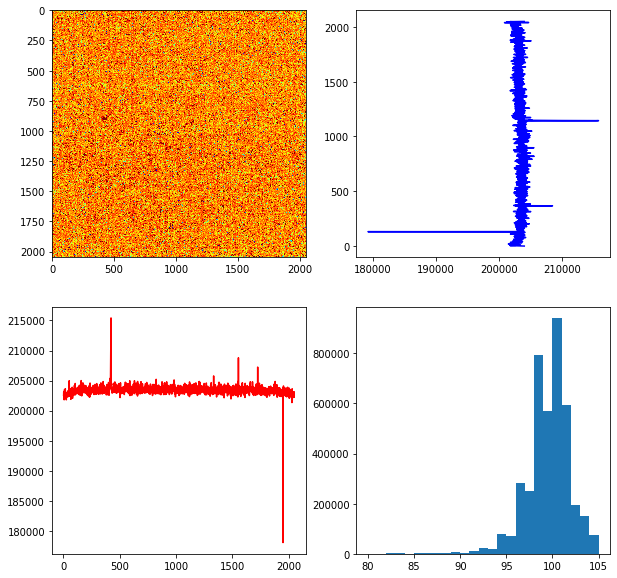

In [20]:
cy.img_proj(img, vmin=80, vmax=105, log=False)

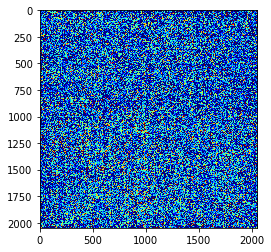

In [21]:
plt.imshow(img,cmap="jet", vmin=98, vmax=105)
plt.show()

In [22]:
mybasepath = '/workarea/cloud-storage/mazzitel/'
m_image, s_image = cy.ped_(3965, path=mybasepath+'ped/')

/workarea/cloud-storage/mazzitel/ped/run3965_mean.h5 /workarea/cloud-storage/mazzitel/ped/run3965_sigma.h5


INFO: mean: 0.03, sigma: 13.63, N out of range: 27031 < vmin=-10, 53655 > vmax=10, insane: 0


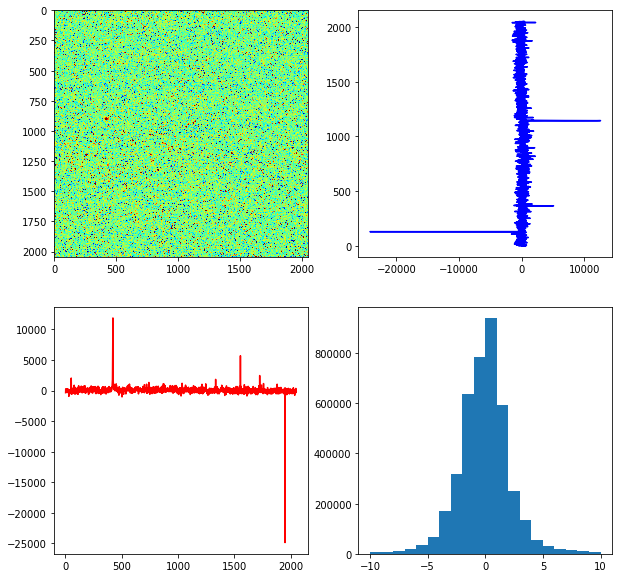

In [23]:
cy.img_proj(img-m_image, vmin=-10, vmax=10, log=False)

In [24]:
nsigma=1
th_image   = np.round(m_image + nsigma*s_image)

INFO: mean: 101.84, sigma: 7.56, N out of range: 1 < vmin=90, 60470 > vmax=110, insane: 0


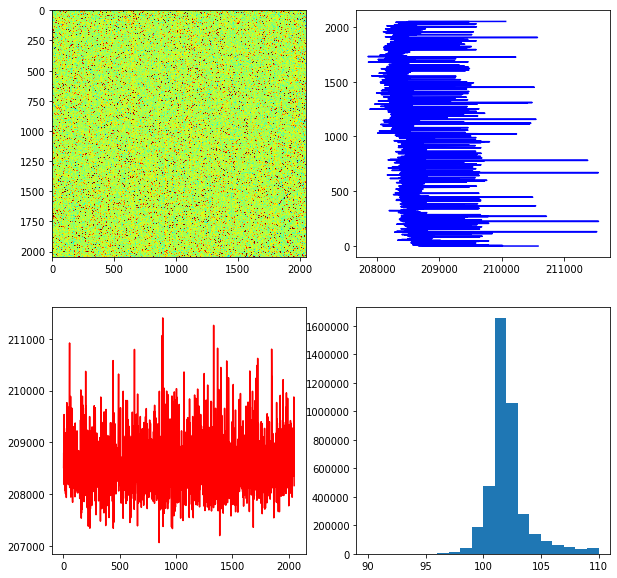

In [25]:
cy.img_proj(th_image, vmin=90, vmax=110, log=False)

In [104]:
edges           = (img > 350)

In [105]:
edges

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [106]:
points          = np.array(np.nonzero(edges)).T.astype(float) 

In [107]:
points

array([[  10., 1723.],
       [ 177., 1332.],
       [ 258., 1715.],
       [ 849.,  967.],
       [ 876.,   50.],
       [ 900.,  420.],
       [ 900.,  421.],
       [ 901.,  419.],
       [ 901.,  420.],
       [ 901.,  421.],
       [ 902.,  418.],
       [ 902.,  419.],
       [ 902.,  420.],
       [ 902.,  421.],
       [ 902.,  422.],
       [ 903.,  415.],
       [ 903.,  416.],
       [ 903.,  417.],
       [ 903.,  418.],
       [ 903.,  419.],
       [ 903.,  420.],
       [ 903.,  421.],
       [ 903.,  422.],
       [ 904.,  416.],
       [ 904.,  417.],
       [ 904.,  418.],
       [ 904.,  419.],
       [ 904.,  420.],
       [ 904.,  421.],
       [ 904.,  422.],
       [ 904.,  423.],
       [ 905.,  417.],
       [ 905.,  418.],
       [ 905.,  419.],
       [ 905.,  420.],
       [ 905.,  421.],
       [ 905.,  422.],
       [ 906.,  418.],
       [ 906.,  419.],
       [ 906.,  420.],
       [ 906.,  421.],
       [ 906.,  422.],
       [ 907.,  418.],
       [ 90

In [108]:
np.array(np.nonzero(edges[edges]))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55]])

In [109]:
i = 0
points[0,1]

1723.0

In [114]:
for i in range(0,10):
    x=int(points[i,1])
    y=int(points[i,0])
    print (x, y, img[y,x], th_image[y,x], m_image[y,x], img[y,x]-th_image[y,x])

1723 10 2374 1123.0 99.30404218435291 1251.0
1332 177 2059 1123.0 99.30404218435291 936.0
1715 258 595 1123.0 99.30404218435291 -528.0
967 849 530 1123.0 99.30404218435291 -593.0
50 876 2051 1123.0 99.30404218435291 928.0
420 900 407 101.0 99.33 306.0
421 900 361 110.0 99.73 251.0
419 901 409 101.0 99.59 308.0
420 901 540 107.0 97.78 433.0
421 901 480 100.0 98.23 380.0


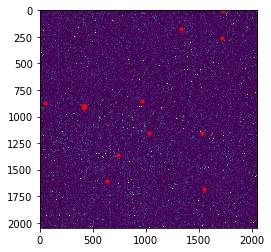

In [115]:
yc = points[:,0]
xc = points[:,1]
plt.imshow(img, vmin=99, vmax = 130)
plt.plot(xc,yc, 'r.')
plt.show()

In [ ]:
np.array(np.nonzero(edges)).T.astype(float) 